In [ ]:
#objective: chest pain an indicator of a heart disease

In [1]:
#load libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
#load data
df = pd.read_table('../datasets/processed.cleveland.data', sep=",", header=None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
              'thalach','exang','oldpeak','slope','ca','thal','class']

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [9]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object

In [11]:
#split data into categorial and cts
df_cts = ['age','trestbps','chol','thalach','oldpeak']
df_cat = ['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal']

In [12]:
#scale data
scaler = preprocessing.StandardScaler()
to_scale_df = df[['age','trestbps','chol','thalach','oldpeak']]
scaled_df = scaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(scaled_df, columns=df_cts)

In [18]:
#one hot encode data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

#['sex','cp','fbs','restecg','exang','oldpeak','slope','ca','thal']

df['sex_encoded'] = le.fit_transform(df.sex)
X = ohe.fit_transform(df.sex_encoded.values.reshape(-1,1)).toarray()
df_sex = pd.DataFrame(X, columns = ["sex_"+str(int(i)) for i in range(X.shape[1])])

df['cp_encoded'] = le.fit_transform(df.cp)
X = ohe.fit_transform(df.cp_encoded.values.reshape(-1,1)).toarray()
df_cp = pd.DataFrame(X, columns = ["cp_"+str(int(i)) for i in range(X.shape[1])])

df['fbs_encoded'] = le.fit_transform(df.fbs)
X = ohe.fit_transform(df.fbs_encoded.values.reshape(-1,1)).toarray()
df_fbs = pd.DataFrame(X, columns = ["fbs_"+str(int(i)) for i in range(X.shape[1])])

df['restecg_encoded'] = le.fit_transform(df.restecg)
X = ohe.fit_transform(df.restecg_encoded.values.reshape(-1,1)).toarray()
df_restecg = pd.DataFrame(X, columns = ["restecg_"+str(int(i)) for i in range(X.shape[1])])

df['exang_encoded'] = le.fit_transform(df.exang)
X = ohe.fit_transform(df.exang_encoded.values.reshape(-1,1)).toarray()
df_exang = pd.DataFrame(X, columns = ["exang_"+str(int(i)) for i in range(X.shape[1])])

df['oldpeak_encoded'] = le.fit_transform(df.oldpeak)
X = ohe.fit_transform(df.oldpeak_encoded.values.reshape(-1,1)).toarray()
df_oldpeak = pd.DataFrame(X, columns = ["oldpeak_"+str(int(i)) for i in range(X.shape[1])])

df['slope_encoded'] = le.fit_transform(df.slope)
X = ohe.fit_transform(df.slope_encoded.values.reshape(-1,1)).toarray()
df_slope = pd.DataFrame(X, columns = ["slope_"+str(int(i)) for i in range(X.shape[1])])

df['ca_encoded'] = le.fit_transform(df.ca)
X = ohe.fit_transform(df.ca_encoded.values.reshape(-1,1)).toarray()
df_ca = pd.DataFrame(X, columns = ["ca_"+str(int(i)) for i in range(X.shape[1])])

df['thal_encoded'] = le.fit_transform(df.thal)
X = ohe.fit_transform(df.thal_encoded.values.reshape(-1,1)).toarray()
df_thal = pd.DataFrame(X, columns = ["thal_"+str(int(i)) for i in range(X.shape[1])])

In [23]:
df_new = pd.concat([df_sex, df_cp, df_fbs, df_restecg, df_exang, df_oldpeak, df_slope, df_ca, df_thal,
                   scaled_df, df['class']], axis=1)

In [24]:
df_new.head()

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,thal_0,thal_1,thal_2,thal_3,age,trestbps,chol,thalach,oldpeak,class
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.948726,0.757525,-0.264900,0.017197,1.087338,0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.392002,1.611220,0.760415,-1.821905,0.397182,2
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,-1.932564,-0.096170,0.063974,1.637359,2.122573,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0


In [25]:
#split data into train and test
X = df_new.drop('class', axis=1)
y = df_new['class']
#y=y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

KNN: 0.607312 (0.095081)
CART: 0.472043 (0.066589)
SVM: 0.576667 (0.090964)
RF: 0.586882 (0.082203)
SGD: 0.554409 (0.085085)
GB: 0.564086 (0.125037)


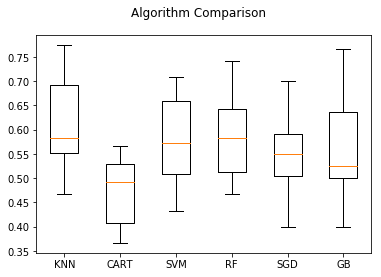

In [26]:
#design model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
#perform classification
array = df_new.values
X = array[:,0:70]
Y = array[:,70]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [27]:
#test chosen model using test data
#model = KNeighborsClassifier()
#model.fit(X_train, y_train)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.631578947368421